In [1]:
#Tarea hecha en conjunto con Cristobal Muñoz y Franco Berrios

In [2]:
import pandas as pd
import numpy as np 
import matplotlib as npl 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('default')

In [3]:
#Datos sacados del producto29 sacado del github min ciencia, esta muestra las cuarentenas totales. 
cuarentenas_totales = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto29/Cuarentenas-Totales.csv?raw=true', sep=',')
cuarentenas_totales.head()

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13


In [4]:
#Extraigo solo los datos que voy a necesitar y dejo las columnas con el mismo nombre
cuarentenas = cuarentenas_totales[["Region", "Nombre", "Código CUT Comuna", "Fecha de Inicio", "Fecha de Término"]]
cuarentenas = cuarentenas.rename(columns = {"Region" : "nRegion", "Código CUT Comuna" : "Codigo comuna", "Nombre" : "Comuna", "Fecha de Inicio" : "Inicio", "Fecha de Término" : "Termino"})
cuarentenas

,nRegion,Comuna,Codigo comuna,Inicio,Termino
0,15,Arica,15101,2020-04-16 22:00:00,2020-05-15 22:00:00
1,13,Santiago Norte,13101,2020-04-13 05:00:00,2020-05-05 22:00:00
2,13,Puente Alto Poniente,13201,2020-04-09 22:00:00,2020-05-08 22:00:00
3,13,El Bosque,13105,2020-04-16 22:00:00,2020-09-21 05:00:00
4,13,San Bernardo Nororiente,13401,2020-04-16 22:00:00,2020-05-08 22:00:00
...,...,...,...,...,...
182,9,Angol,9201,2020-12-10 05:00:00,2020-12-25 22:00:00
183,12,Cabo de Hornos,12201,2020-12-10 05:00:00,2020-12-25 22:00:00
184,8,Los Ángeles,8301,2020-12-12 05:00:00,2020-12-25 22:00:00
185,14,Paillaco,14107,2020-12-12 05:00:00,2020-12-23 05:00:00


In [5]:
#Quito la hora de inicio y termino, ya que no lo necesito. 
fechas = []
for i in range(len(cuarentenas["Inicio"])):
    fechas.append(cuarentenas["Inicio"][i][:10])
cuarentenas["Inicio"] = np.array(fechas)

fechas = []
for i in range(len(cuarentenas["Termino"])):
    fechas.append(cuarentenas["Termino"][i][:10])
cuarentenas["Termino"] = np.array(fechas)

#Modifico el formato de la fecha 
cuarentenas["Inicio"] = pd.to_datetime(cuarentenas["Inicio"], format= "%Y-%m-%d")
cuarentenas["Termino"] = pd.to_datetime(cuarentenas["Termino"], format= "%Y-%m-%d")
cuarentenas

,nRegion,Comuna,Codigo comuna,Inicio,Termino
0,15,Arica,15101,2020-04-16,2020-05-15
1,13,Santiago Norte,13101,2020-04-13,2020-05-05
2,13,Puente Alto Poniente,13201,2020-04-09,2020-05-08
3,13,El Bosque,13105,2020-04-16,2020-09-21
4,13,San Bernardo Nororiente,13401,2020-04-16,2020-05-08
...,...,...,...,...,...
182,9,Angol,9201,2020-12-10,2020-12-25
183,12,Cabo de Hornos,12201,2020-12-10,2020-12-25
184,8,Los Ángeles,8301,2020-12-12,2020-12-25
185,14,Paillaco,14107,2020-12-12,2020-12-23


In [6]:
#Datos sacados del producto1 sacado del github min ciencia,este muestra la cantidad de población en cada comuna 
poblacion_xcomuna = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
poblacion_xcomuna.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31125.0,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,12810.6
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,NaN


In [7]:
#Extraigo solo los datos que voy a ocupar 
p_xcomunas = poblacion_xcomuna[["Region", "Codigo region", "Comuna", "Codigo comuna", "Poblacion"]]
p_xcomunas
#Fijarse que los nombres de las columnas son iguales a las que deje en cuarentenas

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN
...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0
358,Magallanes,12,San Gregorio,12104.0,681.0
359,Magallanes,12,Timaukel,12303.0,282.0
360,Magallanes,12,Torres del Paine,12402.0,1021.0


In [8]:
#Limpio, elimino los datos que aparecen como "Nan"
p_xcomunas = p_xcomunas.dropna()
#Dejo los datos como enteros
# los tipos de datos tienen que ser uniformes, en este caso es mejor tener todos los datos como enteros
p_xcomunas["Codigo comuna"] = p_xcomunas["Codigo comuna"].astype(int)
p_xcomunas["Poblacion"] = p_xcomunas["Poblacion"].astype(int)
p_xcomunas

<ipython-input-8-5a176cdc6598>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_xcomunas["Codigo comuna"] = p_xcomunas["Codigo comuna"].astype(int)
<ipython-input-8-5a176cdc6598>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_xcomunas["Poblacion"] = p_xcomunas["Poblacion"].astype(int)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101,247552
1,Arica y Parinacota,15,Camarones,15102,1233
2,Arica y Parinacota,15,General Lagos,15202,810
3,Arica y Parinacota,15,Putre,15201,2515
5,Tarapacá,1,Alto Hospicio,1107,129999
...,...,...,...,...,...
356,Magallanes,12,Punta Arenas,12101,141984
357,Magallanes,12,Rio Verde,12103,211
358,Magallanes,12,San Gregorio,12104,681
359,Magallanes,12,Timaukel,12303,282


In [9]:
#unir datos del producto29 y del producto1
union_datos = pd.merge(cuarentenas, p_xcomunas[["Region", "Codigo comuna", "Poblacion"]], on = "Codigo comuna")
union_datos

,nRegion,Comuna,Codigo comuna,Inicio,Termino,Region,Poblacion
0,15,Arica,15101,2020-04-16,2020-05-15,Arica y Parinacota,247552
1,15,Arica Re-Ingreso urbano,15101,2020-07-14,2020-11-09,Arica y Parinacota,247552
2,13,Santiago Norte,13101,2020-04-13,2020-05-05,Metropolitana,503147
3,13,Santiago,13101,2020-03-26,2020-04-13,Metropolitana,503147
4,13,Santiago Extensión a Total,13101,2020-05-05,2020-08-17,Metropolitana,503147
...,...,...,...,...,...,...,...
182,8,Arauco,8202,2020-12-10,2020-12-25,Biobío,38679
183,9,Los Sauces,9206,2020-12-10,2020-12-23,Araucanía,7517
184,8,Los Ángeles,8301,2020-12-12,2020-12-25,Biobío,218515
185,14,Paillaco,14107,2020-12-12,2020-12-23,Los Ríos,20798


In [10]:
#Serie de tiempo que empieza desde la prime cuarentena hasta la última cuarentena
fecha_min = min(union_datos["Inicio"])
fecha_max = max(union_datos["Inicio"])
fechas = pd.date_range(start = fecha_min, end = fecha_max)

In [11]:
print(len(fechas), fecha_min, fecha_max) 
#muestra el total de días desde la primera a ultima cuarentena que son 276 y que inicio el 12 de marzo y termino el 12 de diciembre

276 2020-03-12 00:00:00 2020-12-12 00:00:00


In [12]:
# Calcular la cantidad de personas en cuarentena por región en cada fecha

#La siguiente función recibe número de region, intervalo de fechas y calcula para cada fecha el n de personas en cuarentena
#La función retorna una lista de cantidad de personas con el mismo largo del intervalo de fechas, condiciendose con el intervalo entregado
def personas_cuarentena_region(nreg, fechas):
    n_cuarentena = []
    comunas_cuarentena = [] #Lista con comunas en cuarentena durante la fecha iterada. Supuesto: Cuarentena incluye fecha de inicio pero NO LA DE TERMINO
    
    for fecha in fechas:
         #Primero se ve si una comuna entró en cuarentena en la fecha iterada y se agrega a la lista de comunas en cuarentena
        indice = -1
        for f_inicio in union_datos["Inicio"]:
            indice += 1
            if f_inicio == fecha and union_datos["nRegion"][indice] == nreg:
                comunas_cuarentena.append(union_datos["Comuna"][indice])
        
         #Primero se ve si una comuna salió de cuarentena en la fecha iterada y se quita de la lista de comunas en cuarentena
        indice = -1
        for f_termino in union_datos["Termino"]:
            indice += 1
            if f_termino == fecha and union_datos["nRegion"][indice] == nreg:
                comunas_cuarentena.remove(union_datos["Comuna"][indice])
        
       
        #Ahora se suma la población de las comunas en cuarentena 
        n = 0 # Cantidad de personas en cuarentena durante la fecha analizada
        for comuna in comunas_cuarentena:
            #print(np.array(base_datos[base_datos["Comuna"] == comuna]["Poblacion"]))
            n += np.array(union_datos[union_datos["Comuna"] == comuna]["Poblacion"])[0]
        n_cuarentena.append(n)
    
    #Se retorna la lista de personas en cuarentena por cada fecha en la serie entregada
    return n_cuarentena 

In [13]:
#Se generan listas con cantidad de personas en cuarentena por dia para cada region
n1_cuarentena = personas_cuarentena_region(1, fechas)
n2_cuarentena = personas_cuarentena_region(2, fechas)
n3_cuarentena = personas_cuarentena_region(3, fechas)
n4_cuarentena = personas_cuarentena_region(4, fechas)
n5_cuarentena = personas_cuarentena_region(5, fechas)
n6_cuarentena = personas_cuarentena_region(6, fechas)
n7_cuarentena = personas_cuarentena_region(7, fechas)
n8_cuarentena = personas_cuarentena_region(8, fechas)
n9_cuarentena = personas_cuarentena_region(9, fechas)
n10_cuarentena = personas_cuarentena_region(10, fechas)
n11_cuarentena = personas_cuarentena_region(11, fechas)
n12_cuarentena = personas_cuarentena_region(12, fechas)
n13_cuarentena = personas_cuarentena_region(13, fechas)
n14_cuarentena = personas_cuarentena_region(14, fechas)
n15_cuarentena = personas_cuarentena_region(15, fechas)

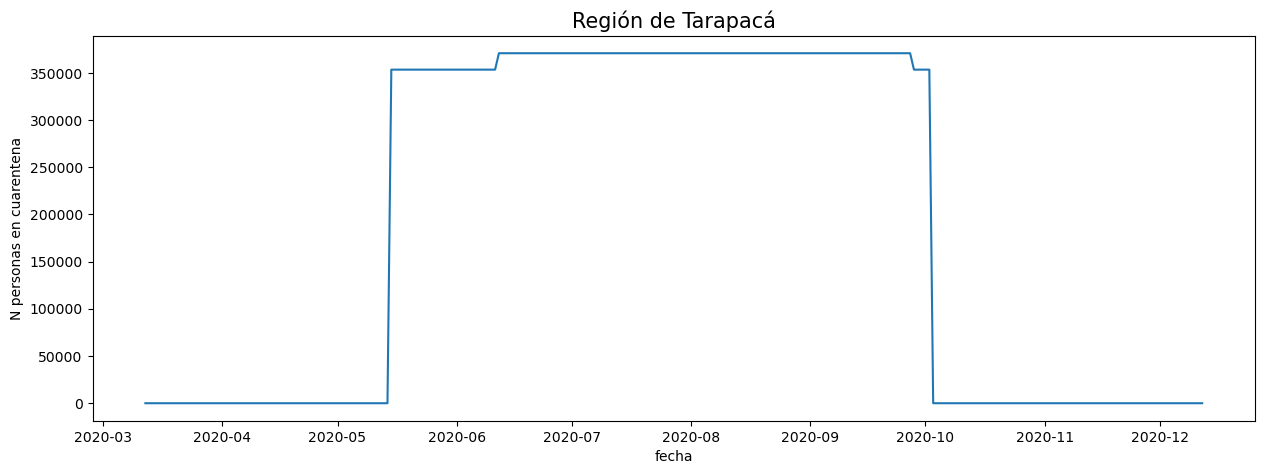


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [14]:
#Grafico para la región de tarapacá (I)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n1_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Tarapacá", fontsize = 15)
plt.show()
indicemin = n1_cuarentena.index(max(n1_cuarentena))
indicemax = len(n1_cuarentena) - n1_cuarentena[::-1].index(max(n1_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n1_cuarentena[indicemin], " personas en cuarentena" )

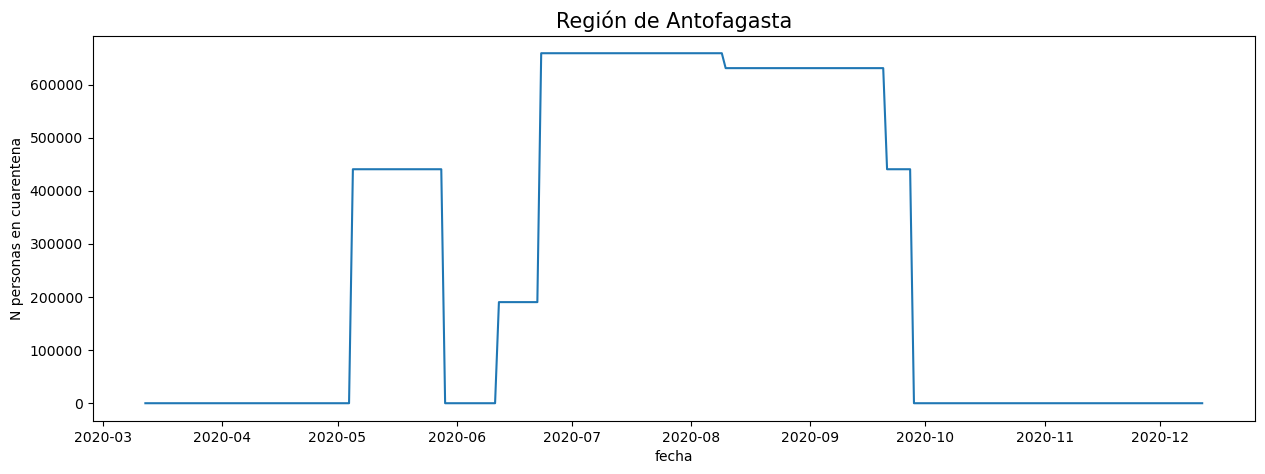


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-06-23 00:00:00  y  2020-08-09 00:00:00  con un total de  658916  personas en cuarentena


In [15]:
#Grafico para la región de Antofagasta (II)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n2_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Antofagasta", fontsize = 15)
plt.show()
indicemin = n2_cuarentena.index(max(n2_cuarentena))
indicemax = len(n2_cuarentena) - n2_cuarentena[::-1].index(max(n2_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n2_cuarentena[indicemin], " personas en cuarentena" )

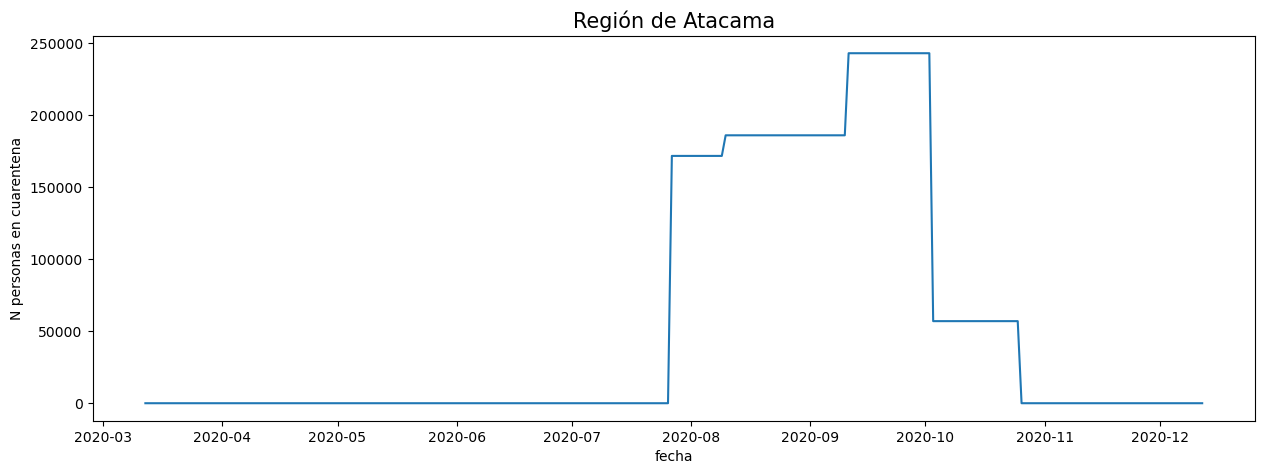


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-09-11 00:00:00  y  2020-10-02 00:00:00  con un total de  243087  personas en cuarentena


In [16]:
#Grafico para la región de Atacama (III)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n3_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Atacama", fontsize = 15)
plt.show()
indicemin = n3_cuarentena.index(max(n3_cuarentena))
indicemax = len(n3_cuarentena) - n3_cuarentena[::-1].index(max(n3_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n3_cuarentena[indicemin], " personas en cuarentena" )

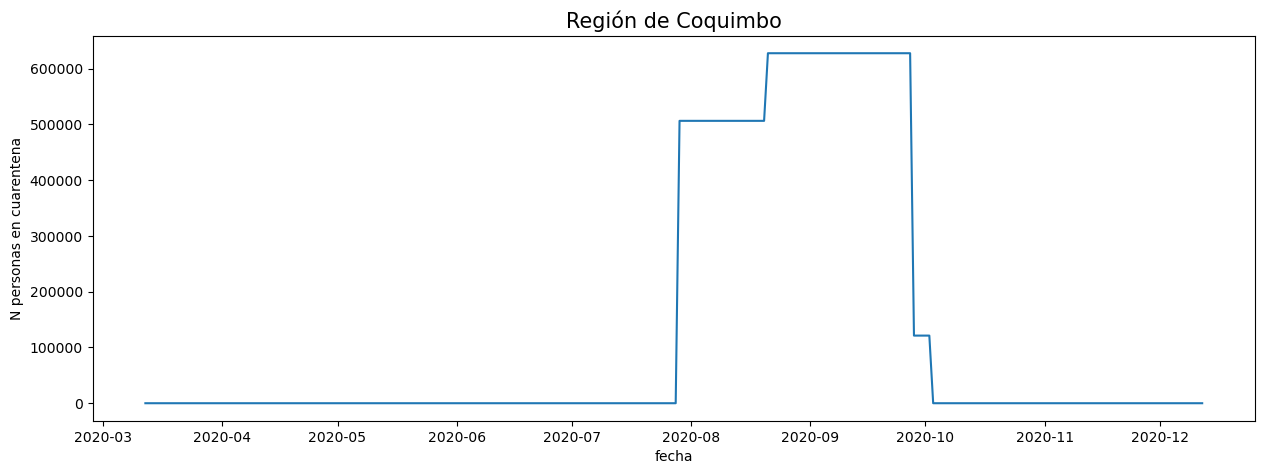


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-08-21 00:00:00  y  2020-09-27 00:00:00  con un total de  627660  personas en cuarentena


In [17]:
#Grafico para la región de Coquimbo (IV)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n4_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Coquimbo", fontsize = 15)
plt.show()
indicemin = n4_cuarentena.index(max(n4_cuarentena))
indicemax = len(n4_cuarentena) - n4_cuarentena[::-1].index(max(n4_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n4_cuarentena[indicemin], " personas en cuarentena" )

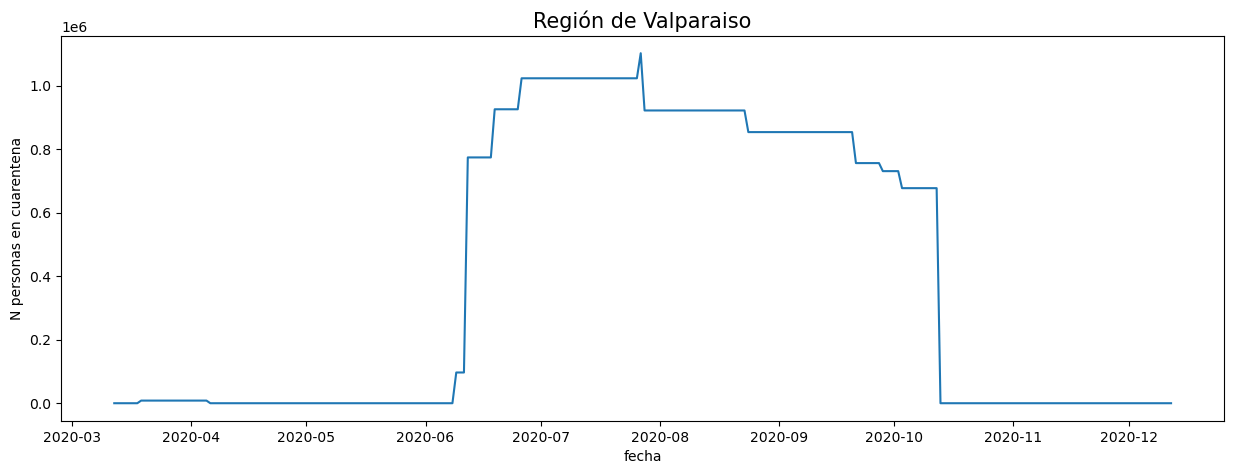


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-07-27 00:00:00  y  2020-07-27 00:00:00  con un total de  1101935  personas en cuarentena


In [18]:
#Grafico para la región de Valparaiso (V)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n5_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Valparaiso", fontsize = 15)
plt.show()
indicemin = n5_cuarentena.index(max(n5_cuarentena))
indicemax = len(n5_cuarentena) - n5_cuarentena[::-1].index(max(n5_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n5_cuarentena[indicemin], " personas en cuarentena" )

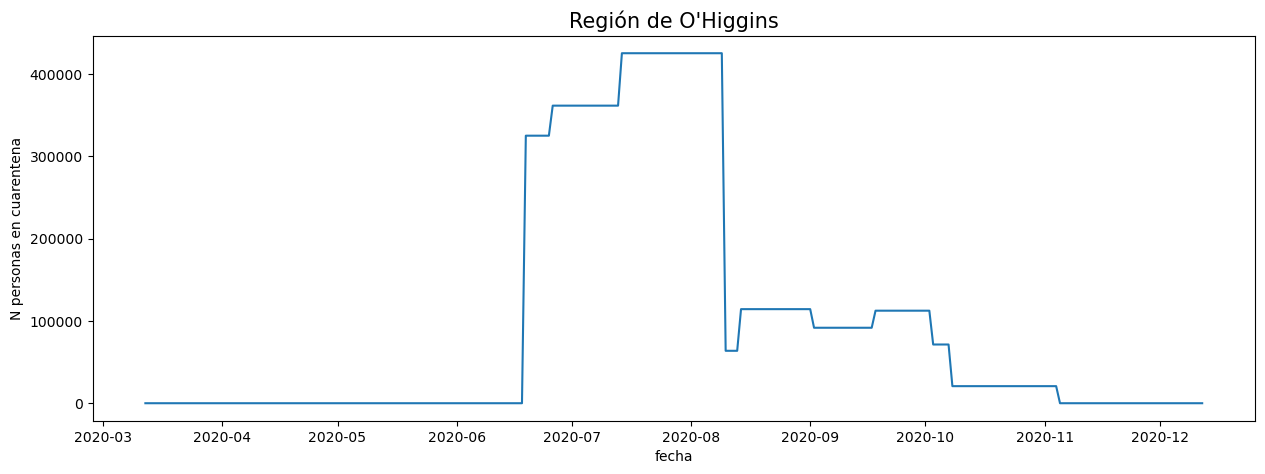


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-07-14 00:00:00  y  2020-08-09 00:00:00  con un total de  425338  personas en cuarentena


In [19]:
#Grafico para la región de O'Higgins (VI)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n6_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de O'Higgins", fontsize = 15)
plt.show()
indicemin = n6_cuarentena.index(max(n6_cuarentena))
indicemax = len(n6_cuarentena) - n6_cuarentena[::-1].index(max(n6_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n6_cuarentena[indicemin], " personas en cuarentena" )

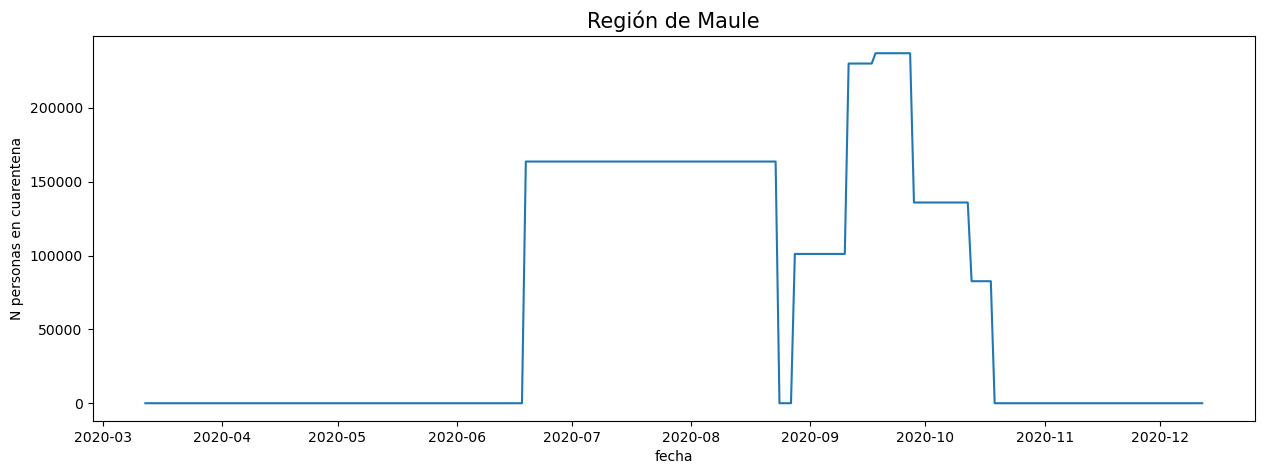


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-09-18 00:00:00  y  2020-09-27 00:00:00  con un total de  236964  personas en cuarentena


In [20]:
#Grafico para la región de Maule (VII)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n7_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Maule", fontsize = 15)
plt.show()
indicemin = n7_cuarentena.index(max(n7_cuarentena))
indicemax = len(n7_cuarentena) - n7_cuarentena[::-1].index(max(n7_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n7_cuarentena[indicemin], " personas en cuarentena" )

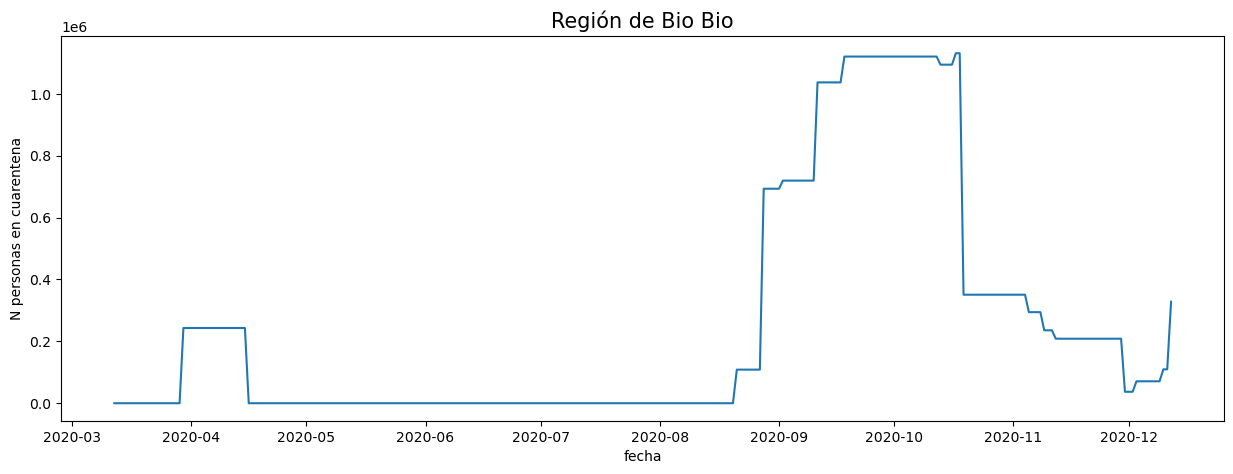


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-10-17 00:00:00  y  2020-10-18 00:00:00  con un total de  1131488  personas en cuarentena


In [21]:
#Grafico para la región de Bio Bio (VIII)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n8_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Bio Bio", fontsize = 15)
plt.show()
indicemin = n8_cuarentena.index(max(n8_cuarentena))
indicemax = len(n8_cuarentena) - n8_cuarentena[::-1].index(max(n8_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n8_cuarentena[indicemin], " personas en cuarentena" )

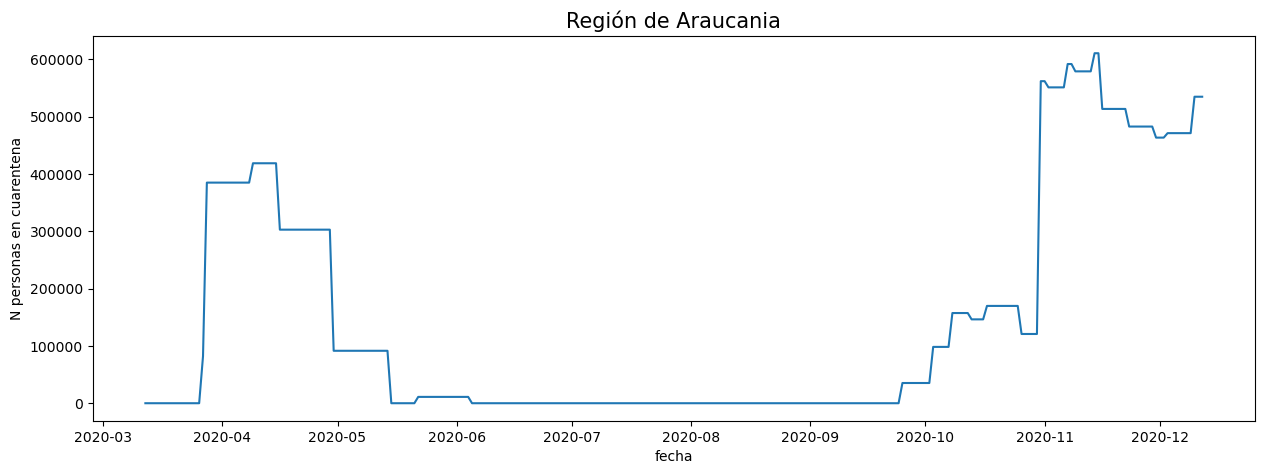


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-11-14 00:00:00  y  2020-11-15 00:00:00  con un total de  610876  personas en cuarentena


In [22]:
#Grafico para la región de Araucania (IX)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n9_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Araucania", fontsize = 15)
plt.show()
indicemin = n9_cuarentena.index(max(n9_cuarentena))
indicemax = len(n9_cuarentena) - n9_cuarentena[::-1].index(max(n9_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n9_cuarentena[indicemin], " personas en cuarentena" )

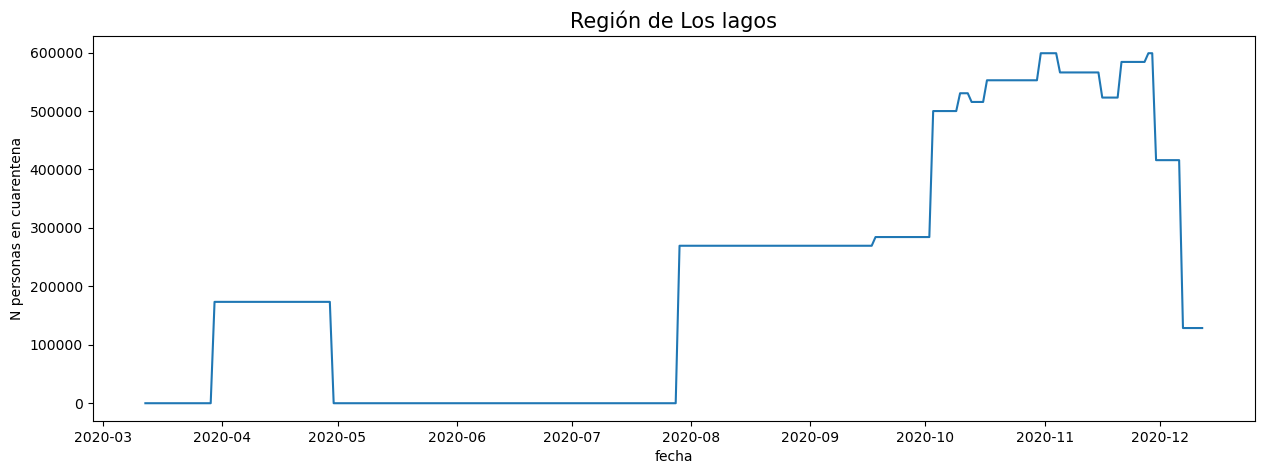


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-11-28 00:00:00  y  2020-11-29 00:00:00  con un total de  598786  personas en cuarentena


In [23]:
#Grafico para la región de Los lagos (X)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n10_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Los lagos", fontsize = 15)
plt.show()
indicemin = n10_cuarentena.index(max(n10_cuarentena))
indicemax = len(n10_cuarentena) - n10_cuarentena[::-1].index(max(n10_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n10_cuarentena[indicemin], " personas en cuarentena" )

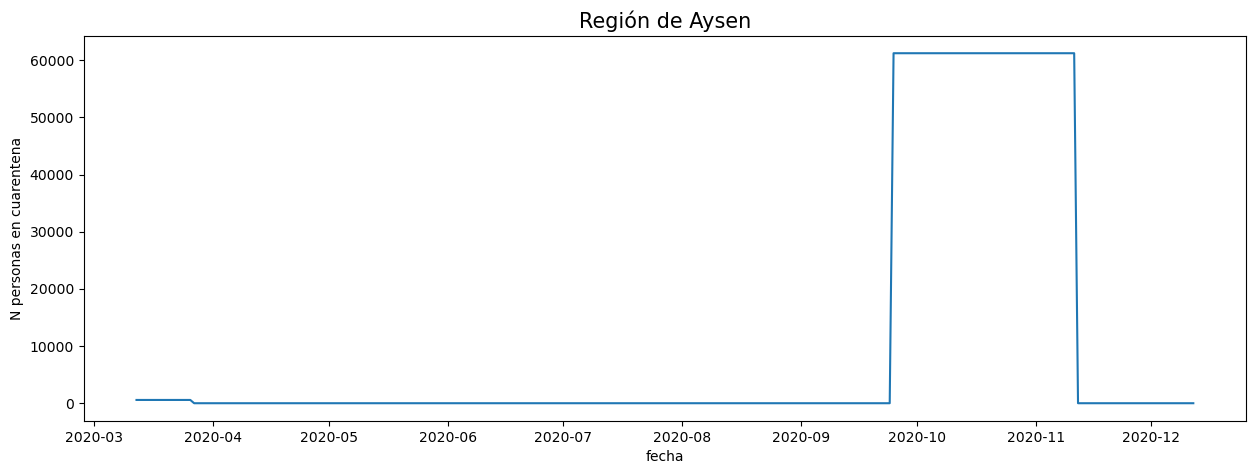


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-09-25 00:00:00  y  2020-11-11 00:00:00  con un total de  61210  personas en cuarentena


In [24]:
#Grafico para la región de Aysen (XI)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n11_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Aysen", fontsize = 15)
plt.show()
indicemin = n11_cuarentena.index(max(n11_cuarentena))
indicemax = len(n11_cuarentena) - n11_cuarentena[::-1].index(max(n11_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n11_cuarentena[indicemin], " personas en cuarentena" )

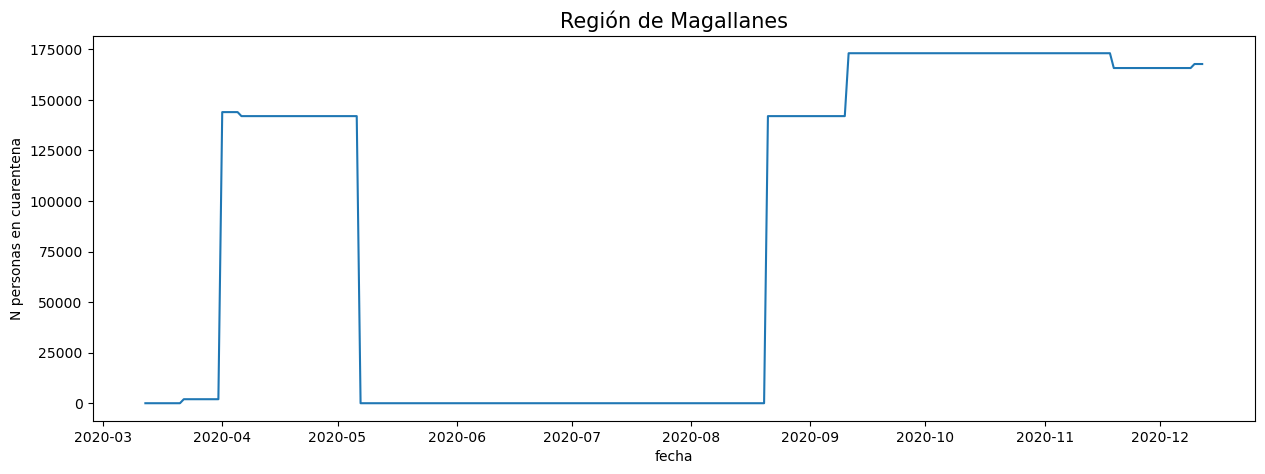


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-09-11 00:00:00  y  2020-11-18 00:00:00  con un total de  173089  personas en cuarentena


In [25]:
#Grafico para la región de Magallanes (XII)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n12_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Magallanes", fontsize = 15)
plt.show()
indicemin = n12_cuarentena.index(max(n12_cuarentena))
indicemax = len(n12_cuarentena) - n12_cuarentena[::-1].index(max(n12_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n12_cuarentena[indicemin], " personas en cuarentena" )

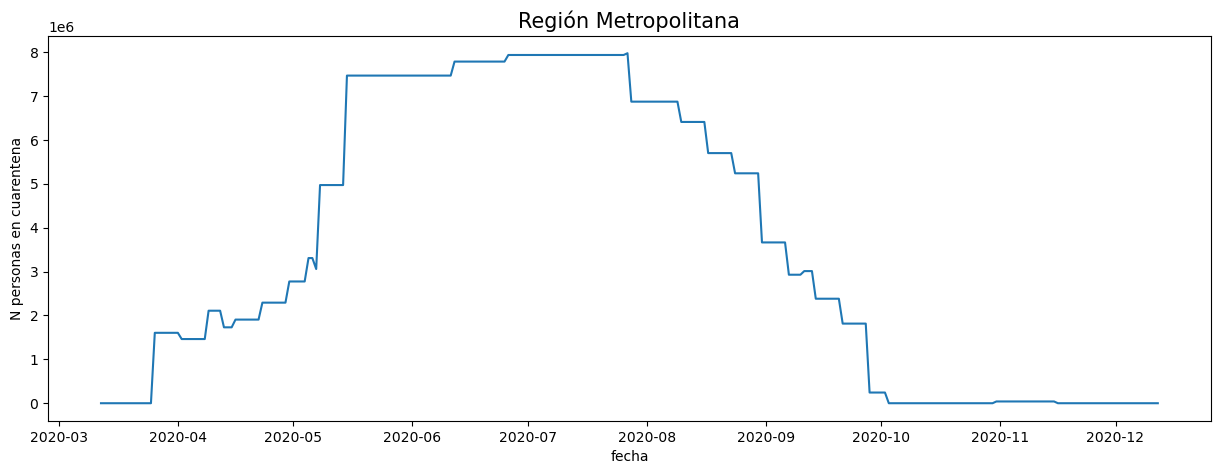


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-07-27 00:00:00  y  2020-07-27 00:00:00  con un total de  7977589  personas en cuarentena


In [26]:
#Grafico para la región Metropolitana (XII)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n13_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región Metropolitana", fontsize = 15)
plt.show()
indicemin = n13_cuarentena.index(max(n13_cuarentena))
indicemax = len(n13_cuarentena) - n13_cuarentena[::-1].index(max(n13_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n13_cuarentena[indicemin], " personas en cuarentena" )

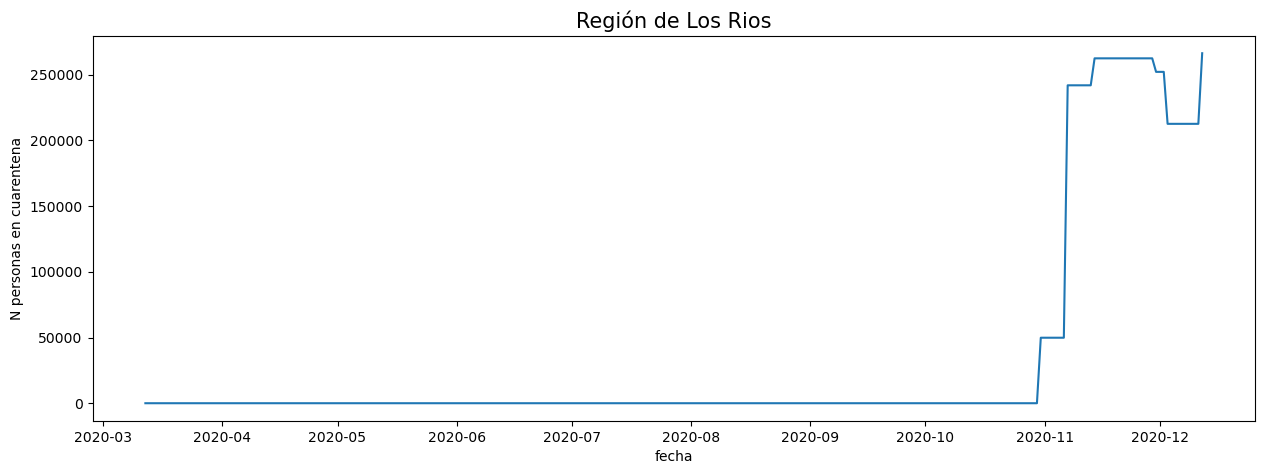


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-12-12 00:00:00  y  2020-12-12 00:00:00  con un total de  266276  personas en cuarentena


In [27]:
#Grafico para la región de Los Rios (XIV)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n14_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Los Rios", fontsize = 15)
plt.show()
indicemin = n14_cuarentena.index(max(n14_cuarentena))
indicemax = len(n14_cuarentena) - n14_cuarentena[::-1].index(max(n14_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n14_cuarentena[indicemin], " personas en cuarentena" )

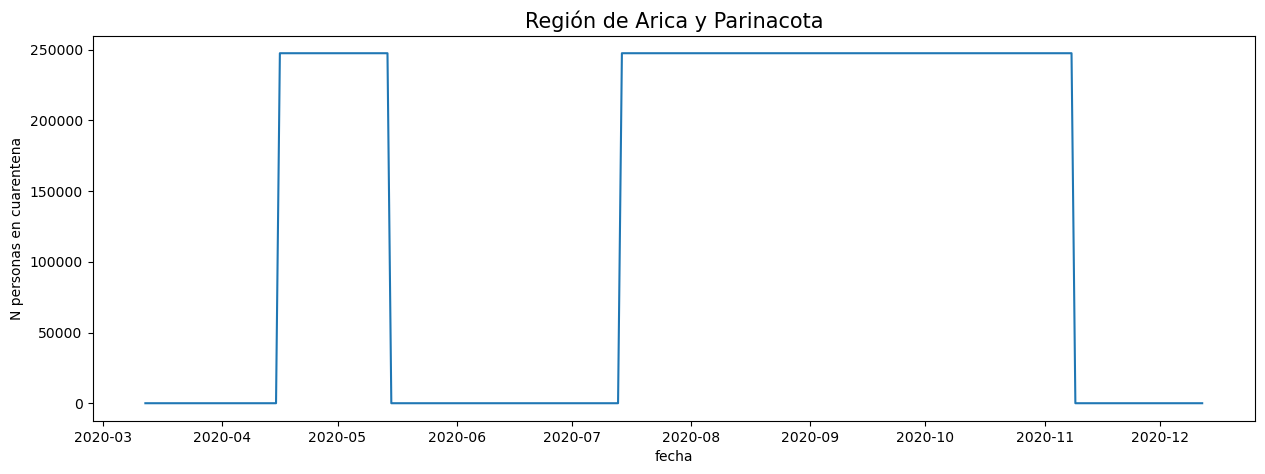


 La mayor cantidad de personas en cuarentena en la región se dio entre las fechas  2020-04-16 00:00:00  y  2020-11-08 00:00:00  con un total de  247552  personas en cuarentena


In [28]:
#Grafico para la región de Arica y Parinacota (XV)
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(fechas, n15_cuarentena)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Arica y Parinacota", fontsize = 15)
plt.show()
indicemin = n15_cuarentena.index(max(n15_cuarentena))
indicemax = len(n15_cuarentena) - n15_cuarentena[::-1].index(max(n15_cuarentena)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n15_cuarentena[indicemin], " personas en cuarentena" )